# Mounting and Import Statements

In [1]:
!pip install plotly_express

In [2]:
# Connect notebook to desired path
# Change dir_path to the new location of this notebook
import os
import sys
dir_path = '/content/gdrive/My Drive/Urban_Computing/Urban_Computing_Project_Fall_2021'
sys.path.append(dir_path)

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
import os, sys
import time
import calendar
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import plotly_express as px

from sklearn import preprocessing, model_selection, neighbors, tree, ensemble, metrics, preprocessing, neural_network


# Data Preprocessing
Basic preprocessing for data exploration

In [18]:
# Import Data and drop unnecessary columns
df = pd.read_csv('/content/gdrive/My Drive/Urban_Computing/Urban_Computing_Project_Fall_2021/NCDOT_BikePedCrash (2).csv', low_memory=False)
data = df.drop([ 'CrashID', 'NumPedsAin',	'NumPedsKil', 'NumPedsBin',	
                'NumPedsCin','NumPedsNoi',	'NumPedsUin',	'NumPedsTot', 'NumUnits', 'OBJECTID'], axis=1)

In [19]:
data['NumLanes'] = data['NumLanes'].str[:1]
data['NumLanes'] = pd.to_numeric(data['NumLanes'], errors='coerce')
data['PedAge'].replace("999", "Unknown", inplace=True)
data['DrvrAge'].replace("999", "Unknown", inplace=True)
data['SpeedLimit'] = data['SpeedLimit'].str[5:7]
data['SpeedLimit'] = pd.to_numeric(data['SpeedLimit'], errors='coerce')
data['SpeedLimit'].replace(5.0, 15.0, inplace=True)
data['PedAge'] = pd.to_numeric(data['PedAge'], errors='coerce')
data['DrvrAge'] = pd.to_numeric(data['DrvrAge'], errors='coerce')
data.replace("Unknown", np.nan, inplace=True)
data.replace("Unknown Injury", np.nan, inplace=True)
data.replace("Unknown/Missing", np.nan, inplace=True)
data.replace(".", np.nan, inplace=True)
data['Class'] = ((data['CrashSevr'] == 'A: Suspected Serious Injury') | (data['CrashSevr'] == 'K: Killed'))
data['Class']= data['Class'].replace (True, "KSI")
data['Class']= data['Class'].replace (False, "Minor Collision");
data['Class'] = pd.Categorical(data['Class'] , ['KSI','Minor Collision'])


In [20]:
# View the counts of null values and the datatype of each feature
pd.set_option("display.max_rows", 100)
null_values = pd.DataFrame((data.isnull().sum()), columns = ['null_count'])
null_values['% Missing'] = null_values['null_count']/ data.shape[0]
null_values['dtype'] = data.dtypes
null_values['Unique Values'] = data.nunique()
null_values

,null_count,% Missing,dtype,Unique Values
X,0,0.000000,float64,36849
Y,0,0.000000,float64,36850
OBJECTID_1,0,0.000000,int64,36934
AmbulanceR,0,0.000000,object,2
City,0,0.000000,object,451
County,0,0.000000,object,100
CrashAlcoh,0,0.000000,object,2
CrashDay,1,0.000027,object,7
CrashGrp,0,0.000000,object,16
CrashHour,0,0.000000,int64,24


In [21]:
data = data.dropna(subset=["CrashLoc"])
data = data.dropna(subset=["CrashDay"])
data = data.dropna(subset=["LightCond"])

In [151]:
#Isolate Data for State and Chapel Hill
state_data = data
ch_data = data[(data.City == "Chapel Hill")]
ch_data.head()

,X,Y,OBJECTID_1,AmbulanceR,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumLanes,PedAge,PedAgeGrp,PedAlcDrg,PedAlcFlag,PedInjury,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Class
68,-79.0605,35.91948,69,No,Chapel Hill,Orange,No,5,Backing Vehicle,18,Non-Intersection,1,C: Possible Injury,Backing Vehicle - Roadway,2007,"Farms, Woods, Pastures",30.0,30-39,NaN,No,O: No Injury,White,Female,Passenger Car,No,35.91948,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.0605,2.0,NaN,NaN,NaN,No,C: Possible Injury,Travel Lane,Black,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Coarse Asphalt,Piedmont,Urban,35.0,No Control Present,Clear,No,Minor Collision
165,-79.0286,35.92906,166,Yes,Chapel Hill,Orange,No,4,Backing Vehicle,12,Non-Roadway,1,C: Possible Injury,Backing Vehicle - Parking Lot,2007,Commercial,NaN,70+,NaN,No,O: No Injury,White,Male,Passenger Car,No,35.92906,Daylight,Urban (>70% Developed),-79.0286,NaN,22.0,21-25,NaN,No,C: Possible Injury,Non-Roadway - Parking Lot / Other,White,Male,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Piedmont,Urban,25.0,No Control Present,Clear,No,Minor Collision
170,-79.0692,35.88617,171,No,Chapel Hill,Orange,No,6,Crossing Roadway - Vehicle Turning,15,Intersection,1,C: Possible Injury,Motorist Left Turn - Parallel Paths,2007,Residential,NaN,NaN,NaN,No,NaN,NaN,NaN,Van,Yes,35.88617,Daylight,Urban (>70% Developed),-79.0692,2.0,13.0,11-15,NaN,No,C: Possible Injury,Crosswalk Area,White,Male,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,25.0,Stop Sign,Clear,No,Minor Collision
237,-79.0498,35.91652,238,Yes,Chapel Hill,Orange,No,3,Crossing Roadway - Vehicle Turning,12,Intersection,2,C: Possible Injury,Motorist Right Turn on Red - Perpendicular Paths,2007,Residential,29.0,25-29,NaN,No,O: No Injury,Black,Female,Passenger Car,No,35.91652,Daylight,Urban (>70% Developed),-79.0498,2.0,19.0,16-20,NaN,No,C: Possible Injury,Crosswalk Area,Asian,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,25.0,Stop And Go Signal,Clear,No,Minor Collision
264,-79.0556,35.93511,265,No,Chapel Hill,Orange,No,1,Other / Unknown - Insufficient Details,9,Non-Intersection,2,C: Possible Injury,Non-Intersection - Other / Unknown,2007,Residential,NaN,NaN,NaN,Missing,NaN,NaN,NaN,NaN,Yes,35.93511,Daylight,Urban (>70% Developed),-79.0556,2.0,NaN,NaN,NaN,No,C: Possible Injury,Other / Unknown,Black,Male,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,35.0,No Control Present,Rain,No,Minor Collision


In [152]:
ch_data = ch_data.dropna(subset=["CrashSevr"])

# Data Exploration

In [153]:
px.set_mapbox_access_token("pk.eyJ1IjoiZG1hdGgwMTAiLCJhIjoiY2t3cWhveno3MG1wOTJwbTh6YnJ5aHdoMSJ9.FqnsHZHLg8TJYhewHnUfyA")
px.scatter_mapbox(ch_data, lat="Y", lon="X",  zoom=11, color='Class', color_discrete_sequence=px.colors.qualitative.Vivid, hover_data=["CrashSevr"])           

In [157]:
year_data = pd.DataFrame(state_data.groupby('CrashYear').count()['X'])
year_data['KSI' ] = pd.DataFrame(state_data.loc[(state_data.Class == "KSI")].groupby('CrashYear').count()['X'])
year_data['Minor Collision'] = pd.DataFrame(state_data.loc[(state_data.Class == "Minor Collision")].groupby('CrashYear').count()['X'])

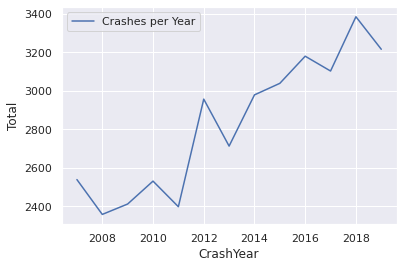

In [223]:
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=year_data, x="CrashYear", y="X", label='Crashes per Year');
ax.set_ylabel("Total");

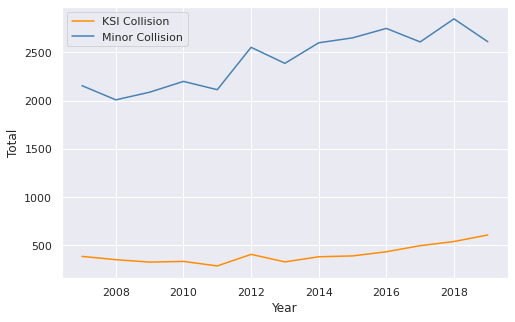

In [159]:
fig, ax = plt.subplots(figsize=(8,5))
ax= sns.lineplot(x='CrashYear', y='KSI', data=year_data, color='darkorange', label= 'KSI Collision')
ax1 = sns.lineplot(x='CrashYear', y='Minor Collision', data=year_data, color='steelblue', label= 'Minor Collision')
ax.set(xlabel='Year', ylabel='Total');

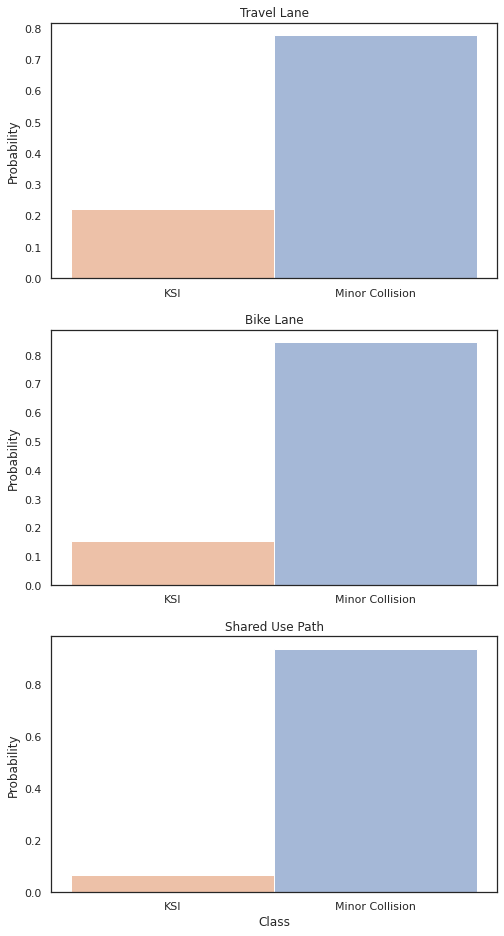

In [220]:
sns.set_theme(style="white")
hue_order = ["Minor Collision", "KSI"]

fig, axes = plt.subplots(3, 1, figsize=(8, 16), sharey=False)
axes[0].set_title('Travel Lane')
axes[0].set_xlabel(" ")
sns.histplot(ax=axes[0], data=state_data[state_data['PedPos'].str.contains("Travel")], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);
axes[1].set_title('Bike Lane')
axes[1].set_xlabel(" ")
sns.histplot(ax=axes[1], data=state_data[state_data['PedPos'].str.contains("Bike")], x="Class", hue="Class", stat='probability',legend=None, hue_order=hue_order);
axes[2].set_title('Shared Use Path')
axes[2].set_xlabel("Class")
sns.histplot(ax=axes[2], data=state_data[state_data['PedPos'].str.contains("Path")], x="Class", hue="Class", stat='probability',legend=None, hue_order=hue_order);

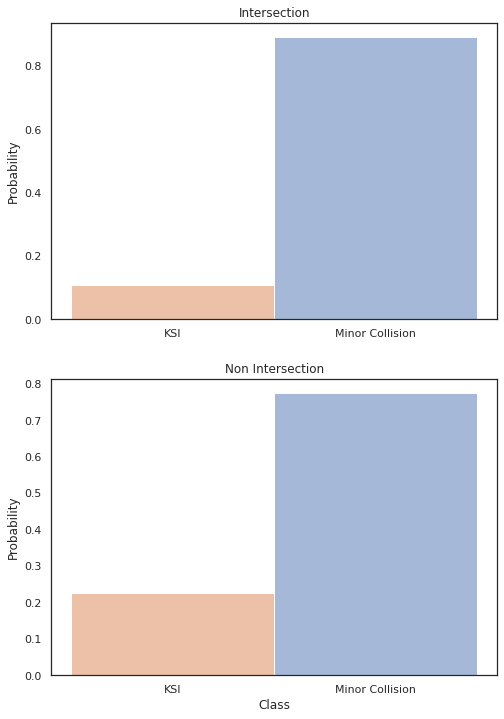

In [161]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharey=False)
axes[0].set_title('Intersection')
axes[0].set_xlabel(" ")
sns.histplot(ax=axes[0], data=state_data[(state_data['CrashLoc'].str.startswith("Intersection"))], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);
axes[1].set_title('Non Intersection')
axes[1].set_xlabel("Class")
sns.histplot(ax=axes[1], data=state_data[state_data['CrashLoc'].str.contains("Non-Intersection")], x="Class", hue="Class", stat='probability',legend=None, hue_order=hue_order);



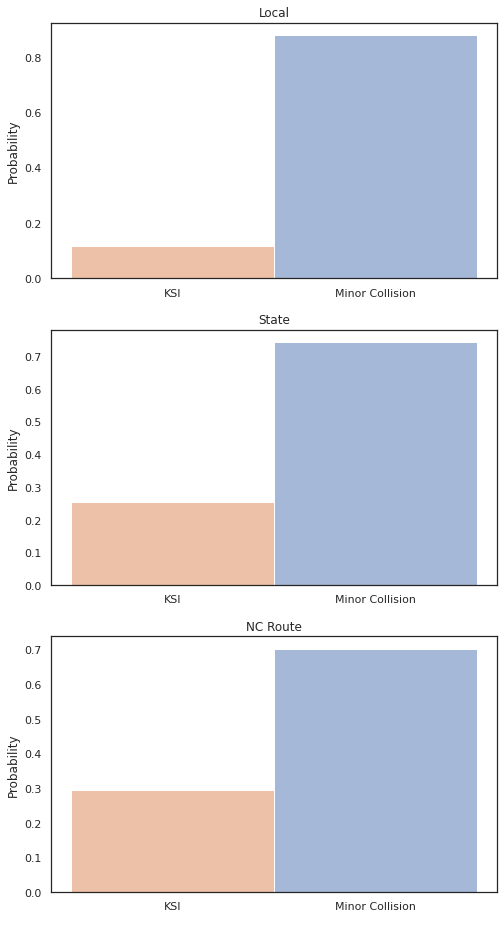

In [162]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16), sharey=False)
axes[0].set_title('Local')
axes[0].set_xlabel(" ")
sns.histplot(ax=axes[0], data=state_data[state_data['RdClass'].str.contains("Local")], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);
axes[1].set_title('State')
axes[1].set_xlabel(" ")
sns.histplot(ax=axes[1], data=state_data[state_data['RdClass'].str.contains("State")], x="Class", hue="Class", stat='probability',legend=None, hue_order=hue_order);
axes[2].set_title('NC Route')
axes[2].set_xlabel(" ")
sns.histplot(ax=axes[2], data=state_data[state_data['RdClass'].str.contains("NC")], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);


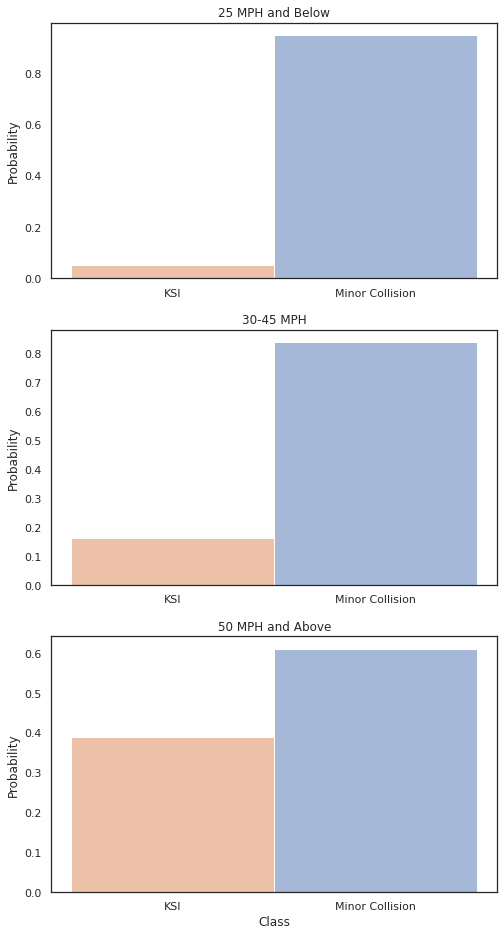

In [163]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16), sharey=False, )
axes[0].set_title('25 MPH and Below')
axes[0].set_xlabel(" ")
sns.histplot(ax=axes[0], data=state_data[state_data['SpeedLimit'] <= 25.0], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);
axes[1].set_title('30-45 MPH')
axes[1].set_xlabel(" ")
sns.histplot(ax=axes[1], data=state_data[(state_data['SpeedLimit'] > 25.0) & (state_data['SpeedLimit'] < 55.0)], x="Class", hue="Class", stat='probability',legend=None, hue_order=hue_order);
axes[2].set_title('50 MPH and Above')
axes[2].set_xlabel("Class")
sns.histplot(ax=axes[2], data=state_data[state_data['SpeedLimit'] >= 55.0], x="Class", hue="Class", stat='probability', legend=None, hue_order=hue_order);


# Data Preprocessing 2
Feature engineering for supervised machine learning

In [32]:
#Change Day and Month to Numeric Representation
d=dict(enumerate(calendar.day_name))
for new, old in d.items():
    state_data['CrashDay'] = state_data['CrashDay'].replace(old, new)

d=dict(enumerate(calendar.month_name))
for new, old in d.items():
    state_data['CrashMonth'] = state_data['CrashMonth'].replace(old, new)


In [206]:
#Drop values that are indicative of target and have little use in training
ml_data = ch_data.drop(['AmbulanceR','OBJECTID_1','DrvrInjury', 'PedInjury', 'CrashSevr', 'X', 'Y','County', 'CrashType', 'DrvrAlcDrg', 'DrvrAlcFlg', 
              'Latitude', 'Longitude', 'PedAlcDrg', 'PedAlcFlag', 'Region', 'DrvrAge', 'PedAge'], axis=1)
ml_data = ml_data.drop(['City'], axis=1)
ml_data.head()

,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashLoc,CrashMonth,CrashYear,Developmen,DrvrAgeGrp,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,LightCond,Locality,NumLanes,PedAgeGrp,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Class
68,No,5,Backing Vehicle,18,Non-Intersection,1,2007,"Farms, Woods, Pastures",30-39,White,Female,Passenger Car,No,Dark - Roadway Not Lighted,Urban (>70% Developed),2.0,NaN,Travel Lane,Black,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Coarse Asphalt,Urban,35.0,No Control Present,Clear,No,Minor Collision
165,No,4,Backing Vehicle,12,Non-Roadway,1,2007,Commercial,70+,White,Male,Passenger Car,No,Daylight,Urban (>70% Developed),NaN,21-25,Non-Roadway - Parking Lot / Other,White,Male,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Urban,25.0,No Control Present,Clear,No,Minor Collision
170,No,6,Crossing Roadway - Vehicle Turning,15,Intersection,1,2007,Residential,NaN,NaN,NaN,Van,Yes,Daylight,Urban (>70% Developed),2.0,11-15,Crosswalk Area,White,Male,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop Sign,Clear,No,Minor Collision
237,No,3,Crossing Roadway - Vehicle Turning,12,Intersection,2,2007,Residential,25-29,Black,Female,Passenger Car,No,Daylight,Urban (>70% Developed),2.0,16-20,Crosswalk Area,Asian,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop And Go Signal,Clear,No,Minor Collision
264,No,1,Other / Unknown - Insufficient Details,9,Non-Intersection,2,2007,Residential,NaN,NaN,NaN,NaN,Yes,Daylight,Urban (>70% Developed),2.0,NaN,Other / Unknown,Black,Male,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,35.0,No Control Present,Rain,No,Minor Collision


In [207]:
ml_data['NumLanes'] = ml_data['NumLanes'].fillna(ml_data['NumLanes'].median())
ml_data['SpeedLimit'] = ml_data['SpeedLimit'].fillna(ml_data['SpeedLimit'].median())

# Impute other missing values with mode. Feature mode often indicates N/A or uknown. See below.
for column in ml_data:
    if ml_data[column].isnull().any():
            ml_data[column]=ml_data[column].fillna(ml_data[column].mode()[0])
ml_data.head()

,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashLoc,CrashMonth,CrashYear,Developmen,DrvrAgeGrp,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,LightCond,Locality,NumLanes,PedAgeGrp,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Class
68,No,5,Backing Vehicle,18,Non-Intersection,1,2007,"Farms, Woods, Pastures",30-39,White,Female,Passenger Car,No,Dark - Roadway Not Lighted,Urban (>70% Developed),2.0,20-24,Travel Lane,Black,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Coarse Asphalt,Urban,35.0,No Control Present,Clear,No,Minor Collision
165,No,4,Backing Vehicle,12,Non-Roadway,1,2007,Commercial,70+,White,Male,Passenger Car,No,Daylight,Urban (>70% Developed),4.0,21-25,Non-Roadway - Parking Lot / Other,White,Male,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Urban,25.0,No Control Present,Clear,No,Minor Collision
170,No,6,Crossing Roadway - Vehicle Turning,15,Intersection,1,2007,Residential,40-49,White,Male,Van,Yes,Daylight,Urban (>70% Developed),2.0,11-15,Crosswalk Area,White,Male,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop Sign,Clear,No,Minor Collision
237,No,3,Crossing Roadway - Vehicle Turning,12,Intersection,2,2007,Residential,25-29,Black,Female,Passenger Car,No,Daylight,Urban (>70% Developed),2.0,16-20,Crosswalk Area,Asian,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop And Go Signal,Clear,No,Minor Collision
264,No,1,Other / Unknown - Insufficient Details,9,Non-Intersection,2,2007,Residential,40-49,White,Male,Passenger Car,Yes,Daylight,Urban (>70% Developed),2.0,20-24,Other / Unknown,Black,Male,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,35.0,No Control Present,Rain,No,Minor Collision


# Supervised Machine Learning

In [208]:
ml_data['Class'].value_counts()


Minor Collision    269
KSI                 24
Name: Class, dtype: int64

In [209]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(ml_data.Class)
X = ml_data.drop(['Class'], axis=1)
X.head()

,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashLoc,CrashMonth,CrashYear,Developmen,DrvrAgeGrp,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,LightCond,Locality,NumLanes,PedAgeGrp,PedPos,PedRace,PedSex,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
68,No,5,Backing Vehicle,18,Non-Intersection,1,2007,"Farms, Woods, Pastures",30-39,White,Female,Passenger Car,No,Dark - Roadway Not Lighted,Urban (>70% Developed),2.0,20-24,Travel Lane,Black,Female,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Coarse Asphalt,Urban,35.0,No Control Present,Clear,No
165,No,4,Backing Vehicle,12,Non-Roadway,1,2007,Commercial,70+,White,Male,Passenger Car,No,Daylight,Urban (>70% Developed),4.0,21-25,Non-Roadway - Parking Lot / Other,White,Male,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Urban,25.0,No Control Present,Clear,No
170,No,6,Crossing Roadway - Vehicle Turning,15,Intersection,1,2007,Residential,40-49,White,Male,Van,Yes,Daylight,Urban (>70% Developed),2.0,11-15,Crosswalk Area,White,Male,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop Sign,Clear,No
237,No,3,Crossing Roadway - Vehicle Turning,12,Intersection,2,2007,Residential,25-29,Black,Female,Passenger Car,No,Daylight,Urban (>70% Developed),2.0,16-20,Crosswalk Area,Asian,Female,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,25.0,Stop And Go Signal,Clear,No
264,No,1,Other / Unknown - Insufficient Details,9,Non-Intersection,2,2007,Residential,40-49,White,Male,Passenger Car,Yes,Daylight,Urban (>70% Developed),2.0,20-24,Other / Unknown,Black,Male,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,35.0,No Control Present,Rain,No


In [210]:
pd.DataFrame(y).value_counts()

1    269
0     24
dtype: int64

In [211]:
X = pd.get_dummies(X)
X.shape


(293, 168)

# ML Experimentation 

In [171]:
from sklearn.metrics import f1_score, make_scorer

f1_custom = make_scorer(f1_score , average='weighted', pos_label=1)

In [172]:
def plot_metric_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(len(params),1,sharex='none', sharey='all',figsize=(8,20))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [173]:
def plot_combined_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z, loc='best')
    return fig

In [174]:
def print_results(grid):
  print ("Best Parameters")
  print (grid.best_params_)
  print()
  print ("Best Estimator")
  print (grid.best_estimator_)
  print()
  print ("Best F1 Score")
  print (grid.best_score_)

In [176]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, stratify=y)


## Decision Tree

In [177]:
dt_clf =  tree.DecisionTreeClassifier()
param_dict = {"criterion": ["gini", "entropy"], "max_depth": range(1,10), "min_samples_leaf": range(1,5)}
grid = model_selection.GridSearchCV(dt_clf, param_grid=param_dict, cv=5, scoring=f1_custom, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train);

In [178]:
print_results(grid)

Best Parameters
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4}

Best Estimator
DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)

Best F1 Score
0.889034490004726


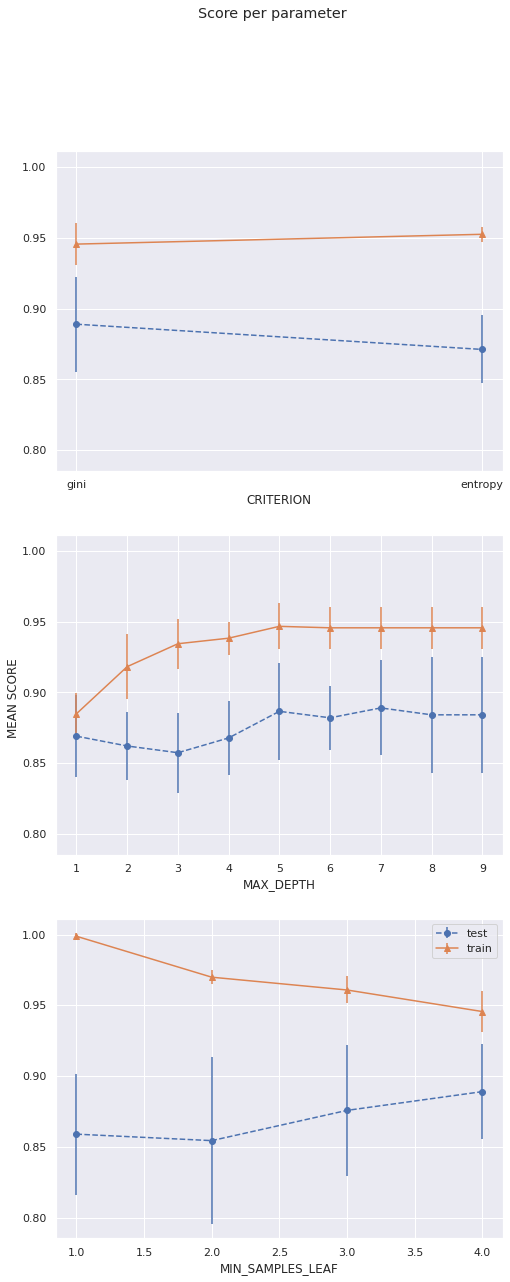

In [179]:
sns.set_theme(style="darkgrid")
plot_metric_results(grid)

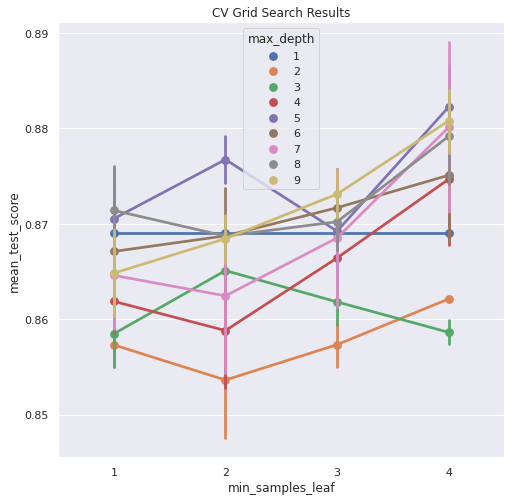

In [180]:
fig = plot_combined_results(grid.cv_results_, 'min_samples_leaf', 'max_depth')

In [181]:
rf_clf =  ensemble.RandomForestClassifier()
param_dict = {'bootstrap': [True, False],
 'max_depth': [1, 2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50]}
rf_grid = model_selection.GridSearchCV(rf_clf, param_grid=param_dict, cv=5, scoring=f1_custom, n_jobs=-1, return_train_score=True)
rf_grid.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib

In [184]:
print_results(rf_grid)

Best Parameters
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Best Estimator
RandomForestClassifier(max_depth=10, n_estimators=10)

Best F1 Score
0.8879475490749039


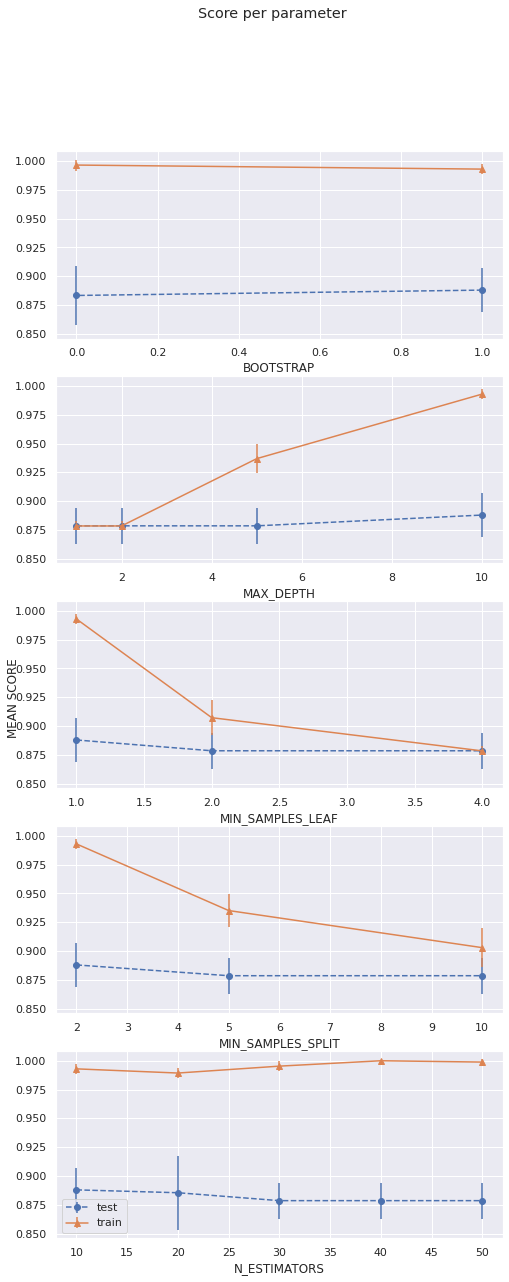

In [185]:
plot_metric_results(rf_grid)

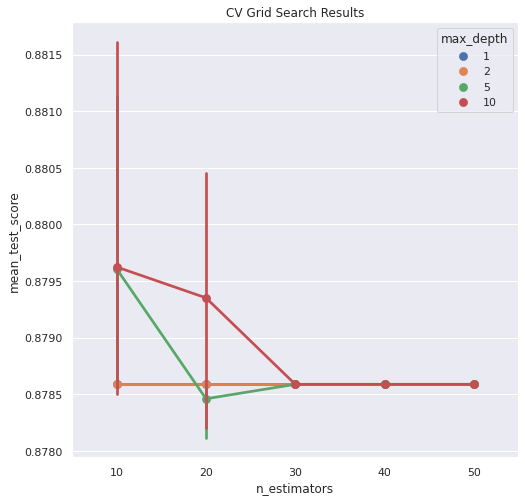

In [186]:
fig = plot_combined_results(rf_grid.cv_results_, 'n_estimators', 'max_depth')

### KNN

In [187]:
knn_clf =  neighbors.KNeighborsClassifier()
param_dict = {'n_neighbors': [1,3,5,7,9,11,13,15],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn_grid = model_selection.GridSearchCV(knn_clf, param_grid=param_dict, cv=5, scoring=f1_custom, n_jobs=-1, return_train_score=True)
knn_grid.fit(X_train, y_train);

In [188]:
print_results(knn_grid)

Best Parameters
{'algorithm': 'ball_tree', 'n_neighbors': 7}

Best Estimator
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

Best F1 Score
0.8785885546556684


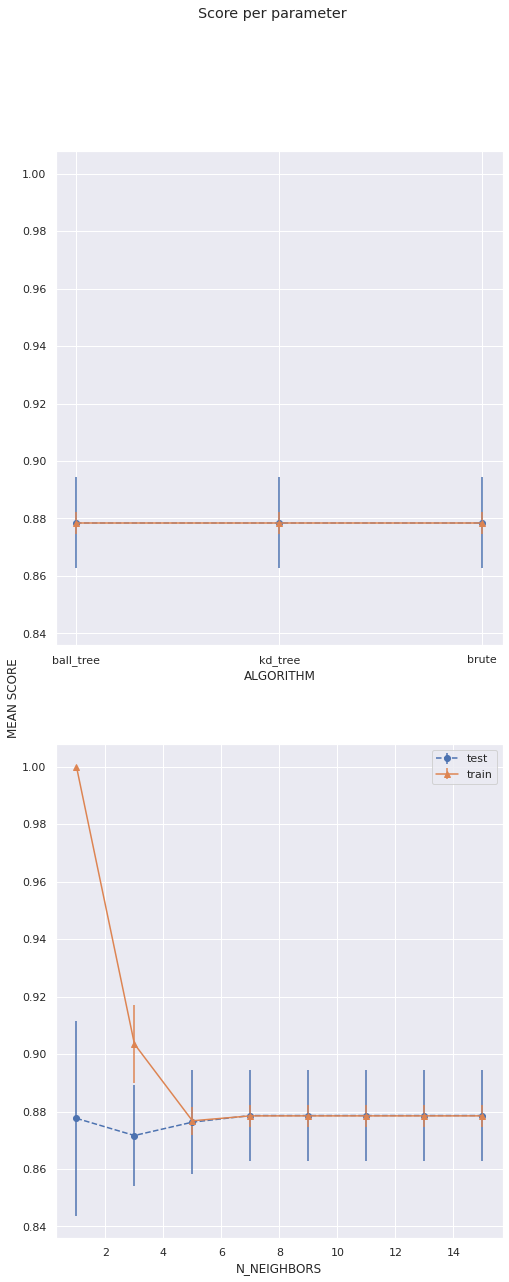

In [189]:
plot_metric_results(knn_grid)

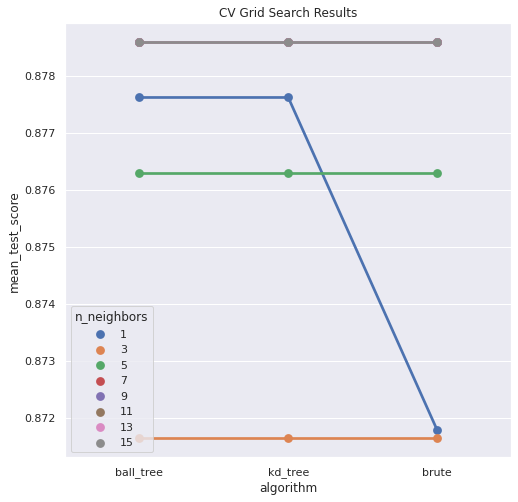

In [190]:
fig = plot_combined_results(knn_grid.cv_results_, 'algorithm', 'n_neighbors')


### MLP

In [191]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [194]:
mlp_clf =  neural_network.MLPClassifier()
param_dict = {
     'solver': ['adam', 'lbfgs'],
     'learning_rate_init': [0.0001],
     'max_iter': [10000],
     'hidden_layer_sizes': [(20, 20, 20), (100, 100, 100), (20, 20, 20, 20, 20), (100, 100, 100, 100, 100)],
     'activation': ['logistic', 'tanh']
     }

mlp_grid = model_selection.GridSearchCV(mlp_clf, param_grid=param_dict, cv=5, scoring=f1_custom, n_jobs=-1, return_train_score=True)
mlp_grid.fit(X_train, y_train);

In [195]:
print_results(mlp_grid)

Best Parameters
{'activation': 'logistic', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate_init': 0.0001, 'max_iter': 10000, 'solver': 'adam'}

Best Estimator
MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              learning_rate_init=0.0001, max_iter=10000)

Best F1 Score
0.8785885546556684


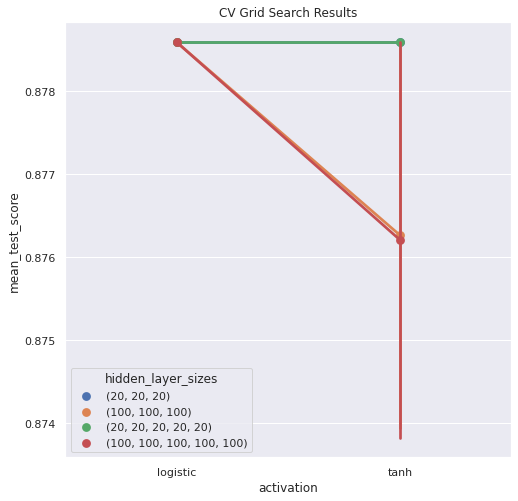

In [196]:
fig = plot_combined_results(mlp_grid.cv_results_, 'activation', 'hidden_layer_sizes')


# Results

In [205]:
# Functions for running and validating supervised classification models on categorical target
def model_eval(df, target, model):

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)

    # Arrays to store metrics
    recall = []
    precision = []
    f1 = []
    timer = []


    for train_index, test_index in kf.split(df, target):
        X_train, X_test = df.iloc[train_index], df.iloc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        start = time.time()
        model.fit(X_train, y_train)
        time_spent = time.time() - start
        y_pred = model.predict(X_test)

        recall += [metrics.recall_score(y_pred, y_test, zero_division=0, average="weighted", labels=[1])]
        precision += [metrics.precision_score(y_pred, y_test, average="weighted", labels=[1])]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted", labels=[1])]
        timer+= [time_spent]

    
    print("recall    = {:.4f} ±{:.4f}".format(np.mean(recall), np.std(recall)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(precision), np.std(precision)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    print('The time to fit this model was {:.4f} seconds'.format(np.mean(timer)))


def scaled_model_eval(df, target, model):

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)

    # Arrays to store metrics
    recall = []
    precision = []
    f1 = []
    timer= []

    for train_index, test_index in kf.split(df, target):
        X_train, X_test = df.iloc[train_index], df.iloc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        X_scaler = preprocessing.StandardScaler()
    
        X_train = X_scaler.fit_transform(X_train)
        start = time.time()
        model.fit(X_train, y_train)
        time_spent = time.time() - start
        X_test = X_scaler.transform(X_test)
        y_pred = model.predict(X_test)

        
        recall += [metrics.recall_score(y_pred, y_test, average="macro", zero_division=0)]
        precision += [metrics.precision_score(y_pred, y_test, average="macro")]
        f1 += [metrics.f1_score(y_pred, y_test, average="macro")]
        timer+= [time_spent]

    
    print("recall    = {:.4f} ±{:.4f}".format(np.mean(recall), np.std(recall)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(precision), np.std(precision)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    print('The time to fit this model was {:.4f} seconds'.format(np.mean(timer)))


### Machine Learning

### Decision Tree

In [203]:
y = pd.DataFrame(y)


In [212]:
dt_model = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)
model_eval(X, y, dt_model)

recall    = 0.9281 ±0.0181
precision = 0.9106 ±0.0383
f1        = 0.9189 ±0.0234
The time to fit this model was 0.0060 seconds


### Random Forest

In [213]:
rf_model = ensemble.RandomForestClassifier(max_depth=10, n_estimators=10)
model_eval(X, y, rf_model)

recall    = 0.9213 ±0.0080
precision = 1.0000 ±0.0000
f1        = 0.9590 ±0.0043
The time to fit this model was 0.0196 seconds


In [218]:
important_features= rf_model.feature_importances_.argsort()[-1:-15:-1]
X.columns[important_features]


Index(['CrashMonth', 'DrvrRace_Black', 'CrashGrp_Unusual Circumstances',
       'CrashYear', 'CrashHour', 'DrvrVehTyp_Other Bus',
       'Locality_Mixed (30% To 70% Developed)', 'PedRace_Black',
       'PedAgeGrp_71+', 'DrvrAgeGrp_40-49', 'Locality_Urban (>70% Developed)',
       'TraffCntrl_Double Yellow Line, No Passing Zone',
       'CrashGrp_Crossing Roadway - Vehicle Not Turning',
       'RdFeature_Four-Way Intersection'],
      dtype='object')

### K Nearest Neighbors

In [216]:
knn_model= neighbors.KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
model_eval(X, y, knn_model)

recall    = 0.9179 ±0.0060
precision = 0.9963 ±0.0074
f1        = 0.9554 ±0.0004
The time to fit this model was 0.0051 seconds


### Multilayer Perceptron

In [217]:
mlp_model = neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              learning_rate_init=0.0001, max_iter=10000)
model_eval(X, y, mlp_model)

recall    = 0.9181 ±0.0065
precision = 1.0000 ±0.0000
f1        = 0.9573 ±0.0035
The time to fit this model was 2.0463 seconds


In [ ]:
cluster= pd.read_csv('/content/gdrive/My Drive/Urban_Computing/Urban_Computing_Project_Fall_2021/First_Cluster.csv')
cluster = cluster.drop(['X', 'Y'], axis=1)
cluster = cluster.merge(ch_data, on='OBJECTID_1', how='inner')
cluster = cluster.loc[(cluster['Cluster'] != 'No Cluster')]

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(cluster, lat="Y", lon="X",  zoom=11, color='Cluster', color_discrete_sequence=px.colors.qualitative.Vivid, hover_data=["CrashSevr"])           

# New Section

In [ ]:
data_ns = pd.read_csv('/content/gdrive/My Drive/Urban_Computing/Urban_Computing_Project_Fall_2021/toMerge.csv')


In [ ]:
data_df = data_ns[["OBJECTID_1", "X", "Y"]].copy()

data_df.head()

,OBJECTID_1,X,Y
0,69,-79.0605,35.91948
1,166,-79.0286,35.92906
2,171,-79.0692,35.88617
3,238,-79.0498,35.91652
4,265,-79.0556,35.93511


In [ ]:
from scipy.spatial.distance import cdist

data_np = data_df.to_numpy()

pos = dict()

for node in data_np:
  pos[node[0].astype(int)] = node[1:3].tolist()

data_np_xy = data_np[:, 1:3]
data_dist = cdist(data_np_xy, data_np_xy, "euclidean")

print(np.amax(data_dist))

0.09354391764162316


In [ ]:
def getDistThreshold(data_np, distances, threshold):

  data_dist_include = np.where(distances < threshold, distances, 0)

  crashes_dict = dict()
  for index_crash, crash in enumerate(data_dist_include):
    curr_crashes = list()
    for index_curr, curr_crash in enumerate(crash):
      if curr_crash != 0:
        curr_crashes.append(data_np[index_curr, 0].astype(int))
    crashes_dict[data_np[index_crash, 0].astype(int)] = curr_crashes

  return crashes_dict

In [ ]:
# Max threshold is 0.011
# Min threshold is 0.000004
thresholds = np.linspace(0.000004, 0.011, 50)

print(thresholds)

num_components = list()
for x in thresholds:
  curr_crashes = getDistThreshold(data_np, data_dist, x)
  graph = nx.Graph(curr_crashes)
  num_components.append(nx.number_connected_components(graph))

print(num_components)

[4.00000000e-06 2.28408163e-04 4.52816327e-04 6.77224490e-04
 9.01632653e-04 1.12604082e-03 1.35044898e-03 1.57485714e-03
 1.79926531e-03 2.02367347e-03 2.24808163e-03 2.47248980e-03
 2.69689796e-03 2.92130612e-03 3.14571429e-03 3.37012245e-03
 3.59453061e-03 3.81893878e-03 4.04334694e-03 4.26775510e-03
 4.49216327e-03 4.71657143e-03 4.94097959e-03 5.16538776e-03
 5.38979592e-03 5.61420408e-03 5.83861224e-03 6.06302041e-03
 6.28742857e-03 6.51183673e-03 6.73624490e-03 6.96065306e-03
 7.18506122e-03 7.40946939e-03 7.63387755e-03 7.85828571e-03
 8.08269388e-03 8.30710204e-03 8.53151020e-03 8.75591837e-03
 8.98032653e-03 9.20473469e-03 9.42914286e-03 9.65355102e-03
 9.87795918e-03 1.01023673e-02 1.03267755e-02 1.05511837e-02
 1.07755918e-02 1.10000000e-02]
[295, 190, 168, 152, 134, 116, 108, 94, 75, 71, 62, 56, 51, 46, 42, 39, 33, 30, 28, 25, 25, 25, 23, 21, 20, 18, 18, 18, 18, 14, 14, 12, 11, 10, 10, 7, 6, 6, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1]


Text(0, 0.5, 'Distance Threshold')

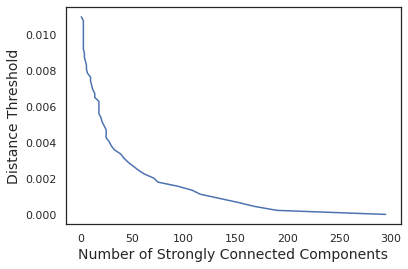

In [ ]:
plt.plot(num_components, thresholds)
plt.xlabel("Number of Strongly Connected Components",fontsize=14)
plt.ylabel("Distance Threshold",fontsize=14)

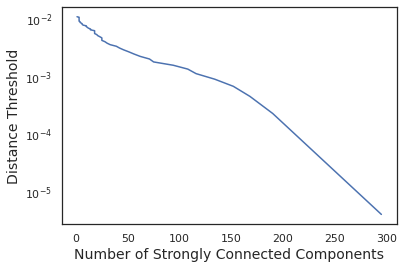

In [ ]:
plt.plot(num_components, thresholds)
plt.xlabel("Number of Strongly Connected Components",fontsize=14)
plt.ylabel("Distance Threshold",fontsize=14)
plt.yscale("log")

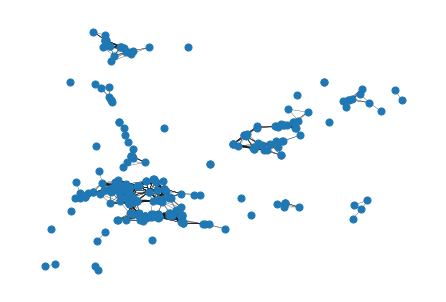

In [ ]:
crashes_dict = getDistThreshold(data_np, data_dist, 0.00472)

graph = nx.Graph(crashes_dict)

nx.draw(graph, pos, width=0.30, node_size=50)

In [ ]:
components = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]

for idx, g in enumerate(components, start = 1):
  print(f"Component {idx}: Nodes: {g.nodes()} Edges: {g.edges()}\n")

Component 1: Nodes: [69, 238, 460, 661, 792, 1018, 1098, 1593, 1620, 1677, 1754, 2096, 2350, 2385, 2387, 2503, 2528, 2799, 2941, 2962, 3256, 3928, 4566, 4654, 4967, 4988, 5037, 5343, 5388, 5538, 5636, 5682, 6006, 6558, 6706, 7051, 7491, 7577, 8177, 8394, 8553, 9027, 9227, 9256, 9390, 9823, 9912, 10543, 10575, 11210, 11373, 11396, 11458, 11518, 11743, 12157, 12446, 12518, 12703, 12898, 12919, 13019, 13208, 13550, 13818, 13867, 14089, 14311, 14657, 14659, 14673, 14763, 14869, 15148, 15306, 15489, 15544, 15588, 15973, 16058, 17062, 17336, 17602, 17681, 18091, 18400, 18783, 18789, 19030, 19134, 19404, 20435, 20587, 20700, 21269, 21488, 21964, 21965, 21966, 21976, 21983, 21984, 21985, 21993, 22606, 22666, 22842, 23147, 23338, 23615, 24988, 24989, 25386, 25887, 26105, 26106, 26201, 26377, 26613, 26920, 27079, 27088, 27089, 27381, 27397, 27398, 27844, 27845, 27861, 28234, 28280, 29156, 29560, 30092, 30181, 30186, 30477, 30551, 30552, 30639, 31289, 31290, 31445, 31452, 31789, 31790, 31850, 321

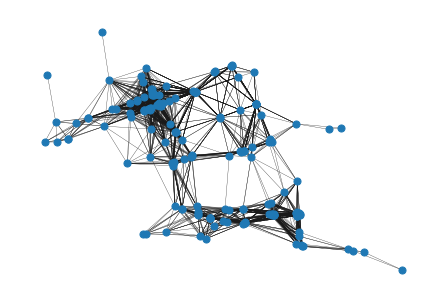

In [ ]:
gcc = sorted(nx.connected_components(graph), key = len, reverse = True)

G0 = graph.subgraph(gcc[0])
G1 = graph.subgraph(gcc[1])
G2 = graph.subgraph(gcc[2])

nx.draw(G0, pos, width=0.30, node_size=50)

In [ ]:
G0_list = list(G0)
G1_list = list(G1)
G2_list = list(G2)

clusters_list = list()

for node in data_np[:, 0]:
  if node in G0_list:
    clusters_list.append("First")
  elif node in G1_list:
    clusters_list.append("Second")
  elif node in G2_list:
    clusters_list.append("Third")
  else:
    clusters_list.append("No Cluster")

data_df["Cluster"] = clusters_list
data_df

#data_df.to_csv("/content/gdrive/My Drive/Clusters.csv")

,OBJECTID_1,X,Y,Cluster
0,69,-79.060500,35.919480,First
1,166,-79.028600,35.929060,Second
2,171,-79.069200,35.886170,No Cluster
3,238,-79.049800,35.916520,First
4,265,-79.055600,35.935110,No Cluster
...,...,...,...,...
290,36860,-79.059328,35.966613,Third
291,36929,-79.048872,35.902854,First
292,36930,-79.044243,35.903764,First
293,36931,-79.054551,35.908198,First


Create three separate dataframes of each cluster
Have them contain all the data just have certain rows in each dataframe

Text(0.5, 1.0, 'Degree Distribution for Largest Cluster')

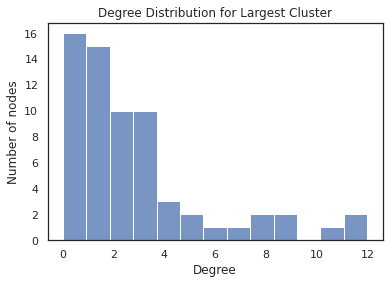

In [ ]:
G0_degreedist = sns.histplot(nx.degree_histogram(G0))
G0_degreedist.set(xlabel = "Degree", ylabel = "Number of nodes")
G0_degreedist.set_title("Degree Distribution for Largest Cluster")

Text(0.5, 1.0, 'Degree Distribution for Largest Cluster')

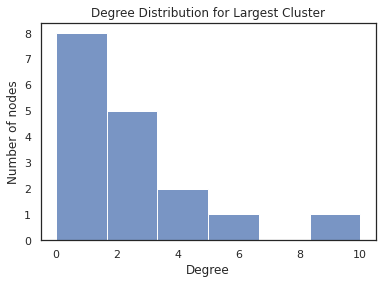

In [ ]:
G1_degreedist = sns.histplot(nx.degree_histogram(G1))
G1_degreedist.set(xlabel = "Degree", ylabel = "Number of nodes")
G1_degreedist.set_title("Degree Distribution for Second Largest Cluster")

Text(0.5, 1.0, 'Degree Distribution for Largest Cluster')

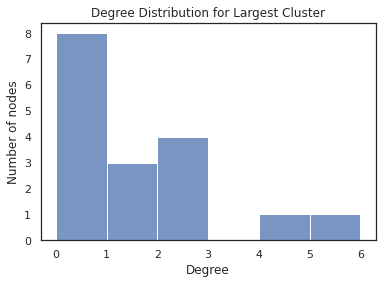

In [ ]:
G2_degreedist = sns.histplot(nx.degree_histogram(G2))
G2_degreedist.set(xlabel = "Degree", ylabel = "Number of nodes")
G2_degreedist.set_title("Degree Distribution for Third Largest Cluster")